In [16]:
#%% regular scientific python imports
import os
import sys
import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#%%

In [17]:
# spatial libraries
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import palplot
%matplotlib inline
import geopandas as gpd
import rasterio
import pysal as ps
from pysal.contrib.viz import mapping as maps

In [18]:
from rasterstats import zonal_stats
import rasterio.plot as rioplot

# Test by merging boundaries with granular shapefile for Nepal

In [19]:
root = '/home/alal/Desktop/code/spatial-experiments/dmsp_processing'
working = root + '/working'

In [9]:
nep_vdc_level_shapes = '/media/alal/LAL_DATA/Data/Geodata/Nepal/Nepal_Admin_Boundaries/Village Development Committees Level 4.shp'

In [10]:
nep_vdc = gpd.read_file(nep_vdc_level_shapes)
nep_vdc.shape

(3983, 10)

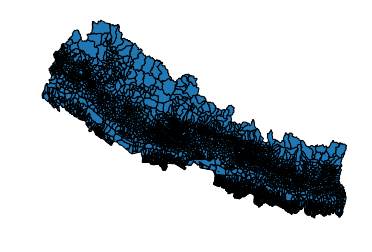

In [7]:
f, ax = plt.subplots(1)
nep_vdc.plot(ax=ax)
plt.axis('off');

## Yearly Plots

In [8]:
dmsp_0 = '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F101992.v4b_web.stable_lights.avg_vis.tif'

In [9]:
lights_by_vdc_0 = gpd.GeoDataFrame.from_features(zonal_stats(nep_vdc_level_shapes, dmsp_0,prefix='lights_',geojson_out=True))

/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.a

In [10]:
lights_by_vdc_0.head()

,AREA,CBS_CODE,DIST_NAME,GlobalID,HLCIT_CODE,OCHA_PCODE,OCHA_VNAME,VDC_NAME,ZONE,geometry,lights_count,lights_max,lights_mean,lights_min
0,2.327311e+07,23001,Sindhupalchok,f16a5cf1-40f3-4eff-9607-98a079585891,524 2 05 23 5 022,C-BAG-23-001,Atarpur,Attarpur,Bagmati,"POLYGON ((85.8847503185724 27.69476271852471, ...",31,0.0,0.0,0.0
1,2.008582e+07,23002,Sindhupalchok,d46262d6-ed91-4398-8c60-28cc28e7e61c,524 2 05 23 5 044,C-BAG-23-002,Badegau,Bandegaun,Bagmati,"POLYGON ((85.63679788831195 27.78658475668124,...",26,0.0,0.0,0.0
2,1.487360e+07,23003,Sindhupalchok,86b23c2b-4ff6-40cb-ab56-685edf5c74aa,524 2 05 23 5 066,C-BAG-23-003,Bansbari,Bansbari,Bagmati,"POLYGON ((85.57585304827961 27.80644393503962,...",20,0.0,0.0,0.0
3,1.497475e+07,23004,Sindhupalchok,ab3ff2c6-991f-490c-a05a-164f6f0dfd79,524 2 05 23 5 054,C-BAG-23-004,Banskharka,Banskharka,Bagmati,"POLYGON ((85.59460644003525 27.92367016534592,...",19,0.0,0.0,0.0
4,1.841612e+07,23005,Sindhupalchok,6ed68ad5-0bde-4de6-a234-4d42fc43678c,524 2 05 23 5 053,C-BAG-23-005,Baramchi,Baramchae,Bagmati,"POLYGON ((85.79470144221784 27.8418023407055, ...",24,0.0,0.0,0.0


In [11]:
lights_by_vdc_0 = lights_by_vdc_0.fillna(0)
lights_by_vdc_0.lights_mean.describe()

count    3983.000000
mean        0.538351
std         2.764279
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        51.076923
Name: lights_mean, dtype: float64

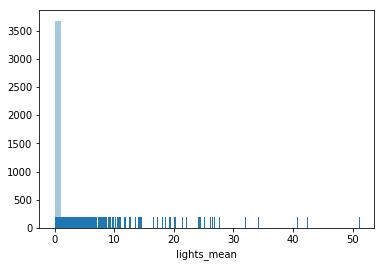

In [12]:
sns.distplot(lights_by_vdc_0['lights_mean'],kde=False,rug=True)

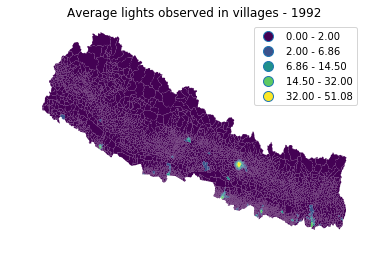

In [13]:
f, ax = plt.subplots(1)
ax.set_title('Average lights observed in villages - 1992')
lights_by_vdc_0.plot(column='lights_mean', scheme='fisher_jenks', k=5, 
                   cmap='viridis', legend=True, linewidth=1, ax=ax)
plt.axis('off');
# plt.savefig(working+'/maps/vdc_test.png', dpi=1080)

## Make maps by year to animate

In [11]:
raster_file_list = [
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F101992.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F101993.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F101994.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F121995.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F121996.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F121997.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F121998.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F141999.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F142000.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F142001.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F142002.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F152003.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F152004.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F152005.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F152006.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F162007.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F162008.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F162009.v4b_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F182010.v4d_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F182011.v4c_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F182012.v4c_web.stable_lights.avg_vis.tif',
    '/media/alal/LAL_DATA/Data/Geodata/DMSP-NightLights/all_stable_lights/F182013.v4c_web.stable_lights.avg_vis.tif'
]

In [12]:
# filename gymnastics to extract year
raster_file_list[1].split('/')[-1][3:7]

'1993'

In [16]:
nep_vdc_shape = '/media/alal/LAL_DATA/Data/Geodata/Nepal/Nepal_Admin_Boundaries/Village Development Committees Level 4.shp'
maps = working+'/maps/'

In [17]:
def light_aggregator_year(raster,
                          shape=nep_vdc_shape,
                          mapdir  = maps,
                          prefix  = 'vdc',
                          savecsv = False,
                          csv_prefix=''):
    year = raster.split('/')[-1][3:7]
    lights_by_polygon = gpd.GeoDataFrame.from_features(zonal_stats(shape, raster,prefix='lights_',geojson_out=True))
    lights_by_polygon = lights_by_polygon.fillna(0)
    # save geodataframe to csv 
    if savecsv:
        csv_target = csv_prefix+'_'+year+'.csv'
        lights_by_polygon.to_csv(csv_target)
    f, ax = plt.subplots(1)
    ax.set_title('Average lights (DMSP) - {0}'.format(year))
    lights_by_polygon.plot(column='lights_mean', scheme='fisher_jenks', k=5, 
                       cmap='viridis', linewidth=1, ax=ax)
    plt.axis('off');
    plt.savefig(mapdir+prefix+'_{0}.png'.format(year), dpi=1080)

In [18]:
%%capture
for raster_year in raster_file_list:
    light_aggregator_year(raster = raster_year,
                          shape  = nep_vdc_shape,
                          mapdir = maps,
                          prefix = 'nep_vdc',
                          savecsv=True,
                          csv_prefix='/home/alal/Desktop/code/spatial-experiments/dmsp_processing/working/yearly_datasets/nepal_vdc')

In [19]:
%cd $maps

/home/alal/Desktop/code/spatial-experiments/dmsp_processing/working/maps


In [20]:
!convert -delay 45 -loop 0 nep_vdc*.png vdc_dmsp_timelapse.gif

In [21]:
# from IPython.display import Image
# Image(filename="vdc_dmsp_timelapse.gif")

## India

In [22]:
india_districts = '/media/alal/LAL_DATA/Data/Geodata/India/Census/2011/DISTRICT_11/DISTRICT_11/DISTRICT_11.shp'

/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.a

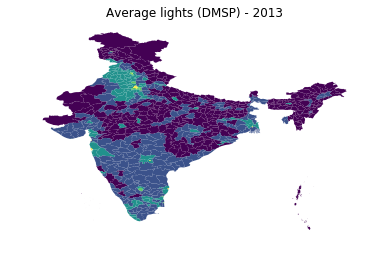

In [23]:
light_aggregator_year(raster = raster_file_list[-1],
                          shape = india_districts,
                          mapdir  = maps,
                          prefix  = 'india_districts',
                          savecsv=False,
                          csv_prefix='')

In [24]:
%%capture
for raster_year in raster_file_list:
    light_aggregator_year(raster = raster_year,
                          shape  = india_districts,
                          mapdir = maps,
                          prefix = 'india_districts',
                          savecsv= True,
                          csv_prefix='/home/alal/Desktop/code/spatial-experiments/dmsp_processing/working/yearly_datasets/india_districts')

In [25]:
!convert -delay 45 -loop 0 india_districts*.png india_dist_dmsp_timelapse.gif

## Merge with world GADM 

~ 68 GB ; runtime ~= 9 hours

In [13]:
def aggregate_by_year(raster,shape,csv_prefix):
    year = raster.split('/')[-1][3:7]
    lights_by_polygon = gpd.GeoDataFrame.from_features(
        zonal_stats(shape,raster,prefix='lights_',geojson_out=True))
    lights_by_polygon = lights_by_polygon.fillna(0)
    csv_target = csv_prefix+'_'+year+'.csv'
    lights_by_polygon.to_csv(csv_target)

In [14]:
gadm = '/media/alal/LAL_DATA/Data/Geodata/Admin_Boundaries/gadm28_all/gadm28.shp'

In [15]:
for raster_year in raster_file_list:
     aggregate_by_year(raster_year,
                       gadm,
                       '/media/alal/LAL_DATA/Data/Geodata/Nighttime_Lights_ADM/gadm')

/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/home/alal/anaconda3/envs/gds/lib/python3.5/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.a